In [163]:
from utils import *
import os
import seaborn as sns
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import spacy
from spacy.matcher import Matcher

In [168]:
# Create dataframe with transcriptions

recordings = '/export/b15/afavaro/stable-ts/GITA_NEW_CONCAT/'
path = [os.path.join(p, file) for file in os.listdir(recordings)]
transcripts = []
for m in path:
    if m.endswith(".wav.txt"):
        transcripts.append(os.path.join(p, m))

tasks=[]
label__ =[]
name_id = []
full_name =[]
transc = []

for every in transcripts:
    full_name.append(os.path.basename(every.split(".wav")[0]))
    name_id.append(os.path.basename(every).split('_',1)[1].split("_")[0])
    m = os.path.basename(every)
    tasks.append(m.split("_", -1)[2])#.split("_")
    label__.append(m.split("_")[0])
    with open(every, "r") as f:
        string_without_line_breaks = ""
        for line in f:
            stripped_line = line.rstrip()
            string_without_line_breaks += stripped_line
        transc.append(string_without_line_breaks)

df= pd.DataFrame(
    {'idx': full_name, 
     'sentence': transc,
     'label': label__,
     'task': tasks
    })

df['sentence'] = df['sentence'].str.lower()

In [172]:
# Load Spanish model
nlp = spacy.load("es_core_news_sm")
stopwords = list(stopwords.words('spanish'))
def preprocess(text):
  # Create Doc object
    doc = nlp(text, disable=['ner'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)

df['Item'] = df['sentence'].apply(preprocess)

In [174]:
def count_words(string):

    """This function returns the number of words in a string"""
    # Split the string into words
    words = string.split()
    # Return the number of words
    return len(words)

#Application to the raw data to get the full word count

df['Word_Count'] = df['sentence'].apply(count_words)

#Application to the preprocessed data to get the content-word count

df['Word_Count_No_stop_words'] = df['Item'].apply(count_words)

In [175]:
def word_length(string):

    """This function returns the average word length in characters for the words in an item"""

    #Get the length of the full text in characters
    chars = len(string)
    #Split the string into words
    words = string.split()
    #Compute the average word length and round the output to the second decimal point
    if len(words)!=0:
        avg_word_length = chars/len(words)
   
        return round(avg_word_length, 2)

df['Avg_Word_Length_no_stop_words'] = df['Item'].apply(word_length)
df['Word_Length'] = df['sentence'].apply(word_length)

In [176]:
def sentence_counter(text):

    """This function returns the number of sentences in an item"""
    doc = nlp(text)
    #Initialize a counter variable
    counter = 0
    #Update the counter for each sentence which can be found in the doc.sents object returned by the Spacy model
    for sentence in doc.sents:
        counter = counter + 1
    return counter

#Note that this function is applied to the raw text in order to identify sentence boundaries
df['Sentence_Count'] = df['sentence'].apply(sentence_counter)

In [177]:
def avg_sent_length(text):

    """This function returns the average sentence length in an item"""

    doc = nlp(text)
    #Initialize a counter variable
    sent_number = 0
    #Update the counter for each sentence which can be found in the doc.sents object returned by the Spacy model
    for sent in doc.sents:
        sent_number = sent_number + 1
    #Get the number of words
    words = text.split()
    #Compute the average sentence length and round it to the second decimal point
    avg_sent_length = len(words)/sent_number
    return round(avg_sent_length, 2)

#Note that this function is applied to the raw text in order to identify sentence boundaries
df['Avg_Sent_Length_in_Words'] = df['sentence'].apply(avg_sent_length)

In [178]:
def nouns(text, model=nlp):

    """This function returns the number of nouns in an item"""
    # Create doc object 
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of nouns
    return pos.count('NOUN')

df['Noun_Count'] = df['Item'].apply(nouns)


In [179]:
def verbs(text, model=nlp):

    """This function returns the number of verbs in an item"""
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of verbs
    return pos.count('VERB')

df['Verb_Count'] = df['Item'].apply(verbs)

In [180]:
def adjectives(text, model=nlp):
    """This function returns the number of adjectives in an item"""
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adjectives
    return pos.count('ADJ')

df['Adjective_Count'] = df['Item'].apply(adjectives)


In [181]:
def numeral(text, model=nlp):
    """This function returns the number of numerals (e.g., billion) in an item"""
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adverbs
    return pos.count('NUM')

df['Numeral_Count'] = df['sentence'].apply(numeral) #meglio estrarlo dall'originale

In [182]:
def aux(text, model=nlp):
    """This function returns the number of auxiliary in an item"""
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adverbs
    return pos.count('AUX')

df['Auxiliary_Count'] = df['sentence'].apply(aux) #meglio estrarlo dall'originale

In [183]:
def get_nps(text):
    """This is a function that outputs the number of noun phrases in an item"""
    doc = nlp(text)
    NP_count = 0
    for np in doc.noun_chunks:
        NP_count = NP_count + 1
    return NP_count
    #print(np)

df['Number_of_NPs'] = df['Item'].apply(get_nps)

In [184]:
def get_pps(text):
    '''This is a function that outputs the number of prepositional phrases in an item'''
    doc = nlp(text)
    pps = 0
    for token in doc:
        # You can try this with other parts of speech for different subtrees.
        if token.pos_ == 'ADP':
            
            #Use the command below if you wanted to get the actual PPs
            #pp = ' '.join([tok.orth_ for tok in token.subtree])
            
            #This command counts the number of PPs
            pps = pps + 1
            
    return pps

df['Number_of_PPs'] = df['Item'].apply(get_pps)

In [185]:
pattern = [{'POS': 'VERB', 'OP': '?'},
           {'POS': 'ADV', 'OP': '*'},
           {'POS': 'AUX', 'OP': '*'},
           {'POS': 'VERB', 'OP': '+'}]

def get_vps(text):
    '''This function returns the number of verb phrases in an item'''
    doc = nlp(text)
    vps = 0
    # instantiate a Matcher instance
    matcher = Matcher(nlp.vocab)
    matcher.add("Verb phrase", [pattern], on_match=None) #new syntax of the command
    # call the matcher to find matches 
    matches = matcher(doc)
    spans = [doc[start:end] for _, start, end in matches]
    for match in matches:
        vps = vps +1
    return vps
    
df['Number_of_VPs'] = df['Item'].apply(get_vps)

In [186]:
# Extract rows from the monologue task
df = df.drop(columns=['Item', 'sentence'])
df = df.dropna()
task_grouped_ = df.groupby('task')
monologue = task_grouped_.get_group("monologue.wav.txt")

,idx,label,task,Word_Count,Word_Count_No_stop_words,Avg_Word_Length_no_stop_words,Word_Length,Sentence_Count,Avg_Sent_Length_in_Words,Noun_Count,Verb_Count,Adjective_Count,Numeral_Count,Auxiliary_Count,Number_of_NPs,Number_of_PPs,Number_of_VPs
0,CN_AVPEPUDEAC0013_monologue,CN,monologue.wav.txt,27,10,7.40,5.44,1,27.00,2,5,2,0,1,2,0,7
1,CN_AVPEPUDEAC0050_monologue,CN,monologue.wav.txt,45,27,6.70,5.76,1,45.00,7,14,2,0,0,7,0,29
2,PD_AVPEPUDEA0009_monologue,PD,monologue.wav.txt,141,62,7.18,6.13,1,141.00,17,17,11,1,1,14,0,28
3,PD_AVPEPUDEA0020_monologue,PD,monologue.wav.txt,55,22,6.41,4.75,1,55.00,10,6,2,2,2,7,0,9
4,CN_AVPEPUDEAC0034_monologue,CN,monologue.wav.txt,134,64,6.80,5.09,2,67.00,16,20,9,5,2,14,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,PD_AVPEPUDEA0001_readtext,PD,readtext.wav.txt,35,16,5.81,5.00,3,11.67,3,7,1,0,3,3,0,16
295,CN_AVPEPUDEAC0051_readtext,CN,readtext.wav.txt,33,16,5.50,5.24,4,8.25,3,6,1,0,3,3,0,10
296,CN_AVPEPUDEAC0017_readtext,CN,readtext.wav.txt,32,17,5.59,5.31,4,8.00,2,8,1,0,1,3,0,14
297,CN_AVPEPUDEAC0025_readtext,CN,readtext.wav.txt,30,14,5.86,5.50,4,7.50,2,6,1,0,2,2,0,11


In [189]:
# Group by class
grouped = monologue.groupby('label')
control = grouped.get_group('CN') 
parkinson_ = grouped.get_group("PD")
task = monologue.columns[3:].values.tolist()
PD_all_feat = np.array([parkinson_[feat] for feat in np.array(monologue.columns[3:])])
CN_all_feat = np.array([control[feat] for feat in np.array(monologue.columns[3:])])

with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Linguistic/monologue.txt', 'w') as f:
 
    kruskal(f, task, CN_all_feat,  PD_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Linguistic/monologue.txt')
holm_correction(kruskal_1)

([], [])

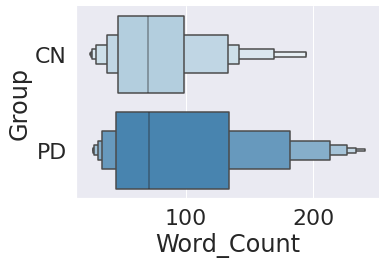

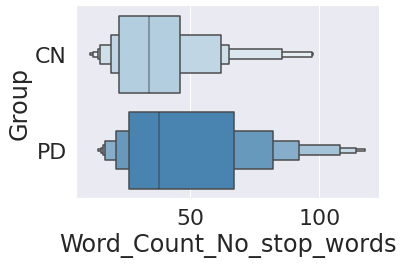

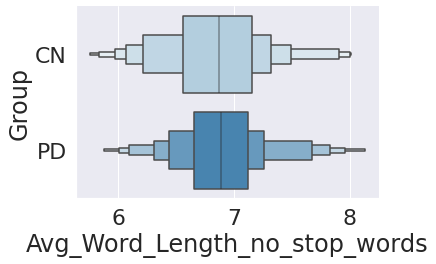

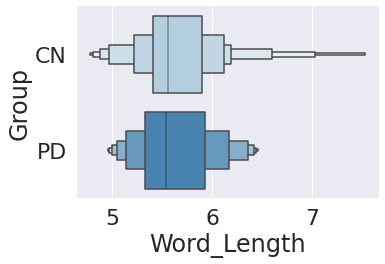

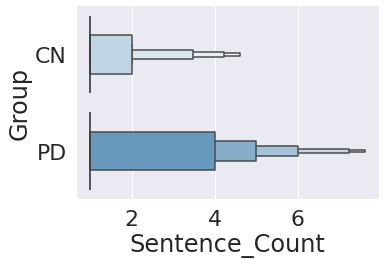

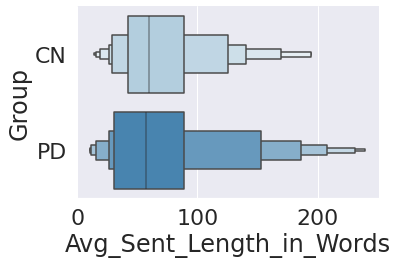

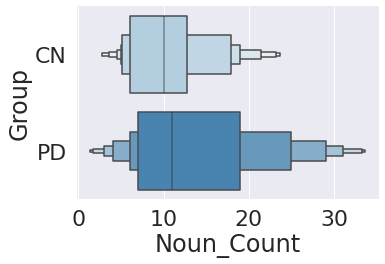

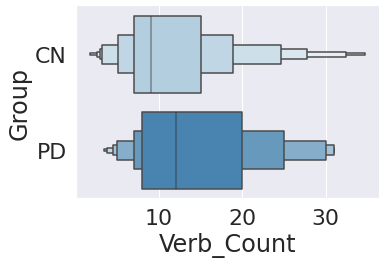

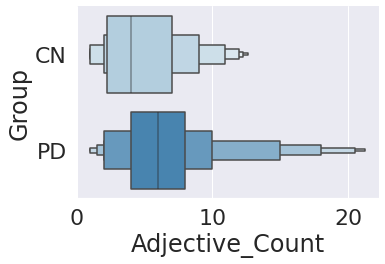

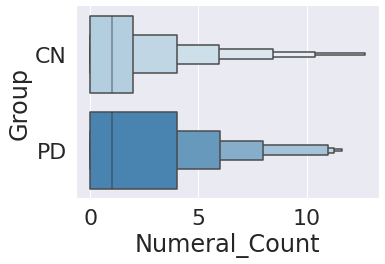

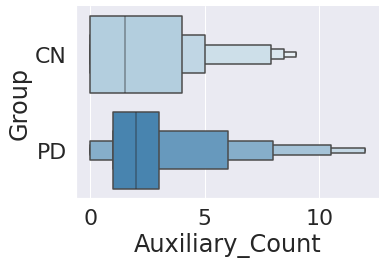

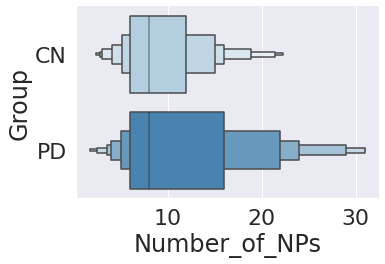

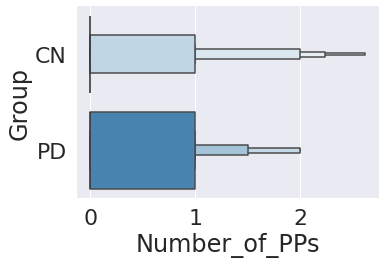

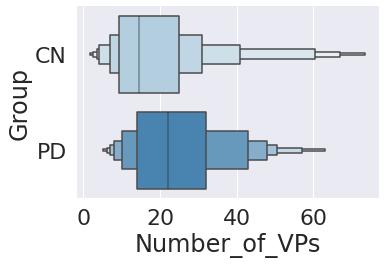

In [190]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([PD_all_feat[i], CN_all_feat[i]])
    data = data.tolist()
    [parkinson.append('PD') for value in range(len(PD_all_feat[i]))]
    [controls.append('CN') for value in range(len(CN_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)

    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    